In [5]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'mysql'

In [1]:
connection = mysql.connector.connect(
    user='root',
    password='6556',
    host='localhost',
    database='Ecomerce_data_analysis' 
)

NameError: name 'mysql' is not defined

In [ ]:
cursor = connection.cursor()


In [ ]:
cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [ ]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [ ]:
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [ ]:
print("\nMissing Values:")
print(customer_data.isna().sum())
print(product_data.isna().sum())
print(order_data.isna().sum())



Missing Values:
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


In [ ]:
print("\nData Types:")
print(customer_data.dtypes)
print(product_data.dtypes)
print(order_data.dtypes)


Data Types:
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object
order_id                 int64
customer_id             object
product_id              object
quantity               float64
total_price            float64
payment_mode            object
order_date      datetime64[ns]
order_status            object
dtype: object


In [ ]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
Q1 = order_data['quantity'].quantile(0.25)
Q3 = order_data['quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()
print(f"Average Selling Price: {average_selling_price:.2f}")
print(f"Maximum Selling Price: {maximum_selling_price:.2f}")
print(f"Minimum Selling Price: {minimum_selling_price:.2f}")


Average Selling Price: 253.36
Maximum Selling Price: 484.05
Minimum Selling Price: 5.11



Total Number of Products by Category:
category
Books              7
Clothing          10
Electronics       16
Home & Kitchen     8
Toys               9
Name: product_id, dtype: int64


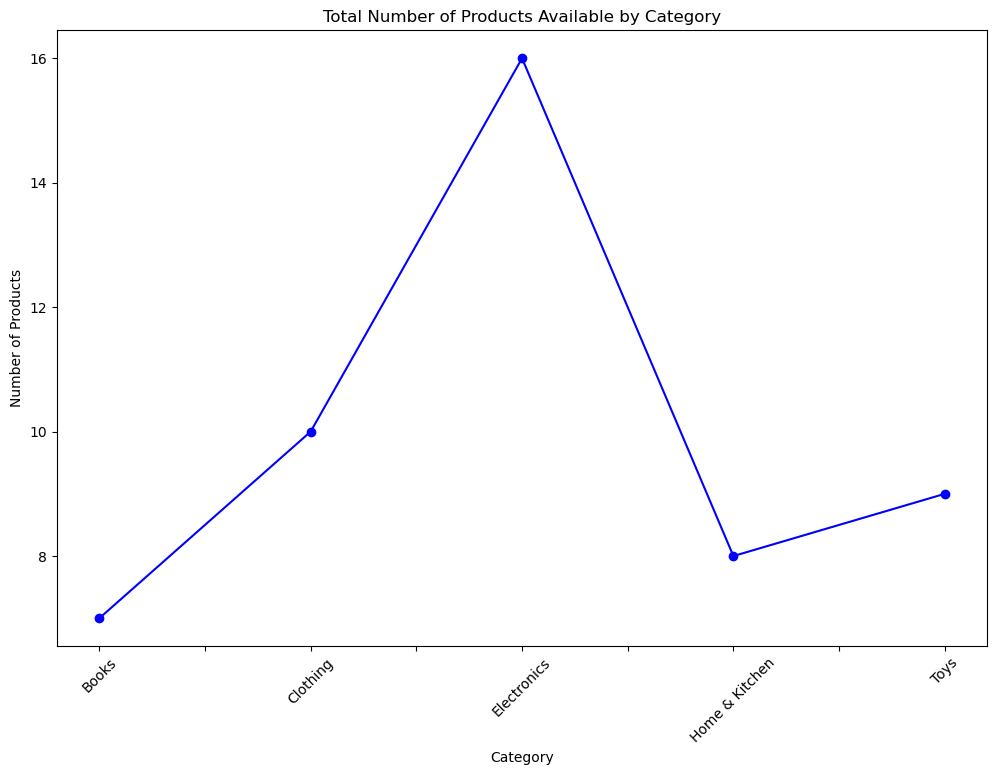

In [ ]:
products_per_category = product_data.groupby('category')['product_id'].count()
print("\nTotal Number of Products by Category:")
print(products_per_category)
products_per_category.plot(kind='line', figsize=(12, 8), color='blue',marker='o')

plt.title('Total Number of Products Available by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


City-wise Customer Count:


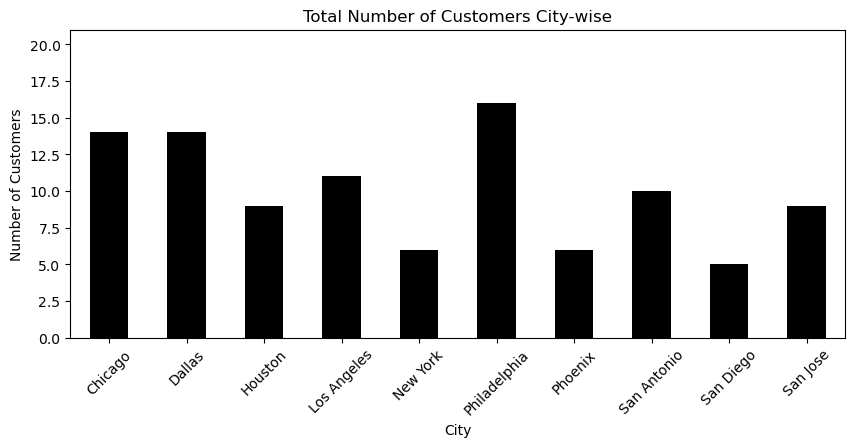

In [ ]:
if 'city' in customer_data.columns:
    city_wise_customers = customer_data.groupby('city')['customer_id'].count()
    
    print("\nCity-wise Customer Count:")
    # print(city_wise_customers)
    
    if not city_wise_customers.empty:
        ax = city_wise_customers.plot(kind='bar', figsize=(10, 4), color='black')
        
        plt.title('Total Number of Customers City-wise')
        plt.xlabel('City')
        plt.ylabel('Number of Customers')
        plt.xticks(rotation=45)
        
        max_y = city_wise_customers.max()  
        plt.ylim(0, max_y + 5)  
        plt.show()
    else:
        print("No customer data available to plot for any city.")
else:
    print("The 'city' column is not present in the customer data.")



Total Number of Products by Sub-Category:


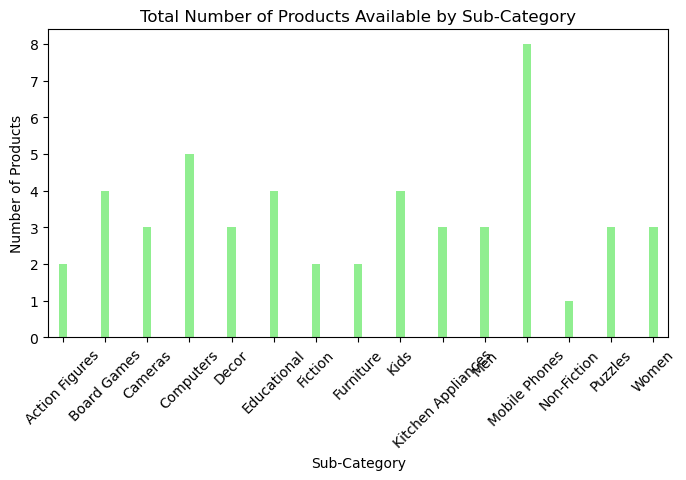

In [ ]:
products_per_subcategory = product_data.groupby('sub_category')['product_id'].count()
print("\nTotal Number of Products by Sub-Category:")
# print(products_per_subcategory)

products_per_subcategory.plot(kind='bar', figsize=(8,4), color='lightgreen',width=0.2)
plt.title('Total Number of Products Available by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

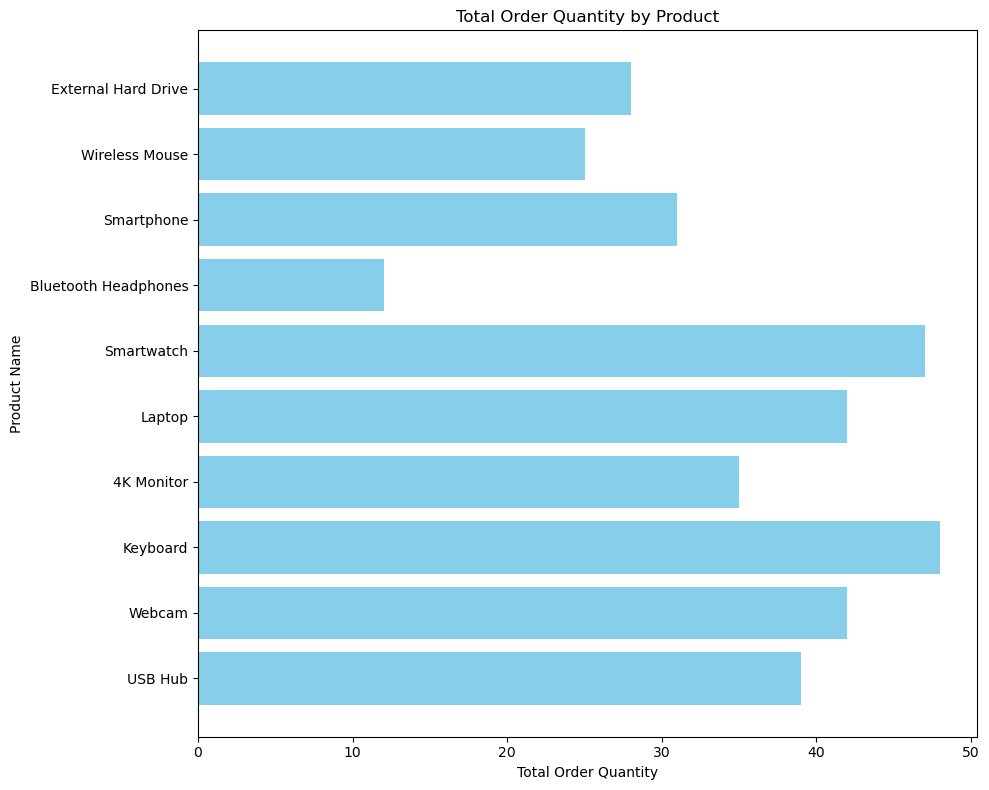

In [ ]:
total_quantity_by_product = order_data.groupby('product_id')['quantity'].sum()
product_quantity_data = total_quantity_by_product.reset_index().merge(product_data[['product_id', 'product_name']], on='product_id')
product_quantity_data = product_quantity_data.sort_values('quantity', ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(product_quantity_data['product_name'], product_quantity_data['quantity'], color='skyblue')
plt.title('Total Order Quantity by Product')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.xticks(range(0, int(product_quantity_data['quantity'].max()) + 10, 10))  # X-axis ticks as multiples of 10
plt.tight_layout()
plt.show()


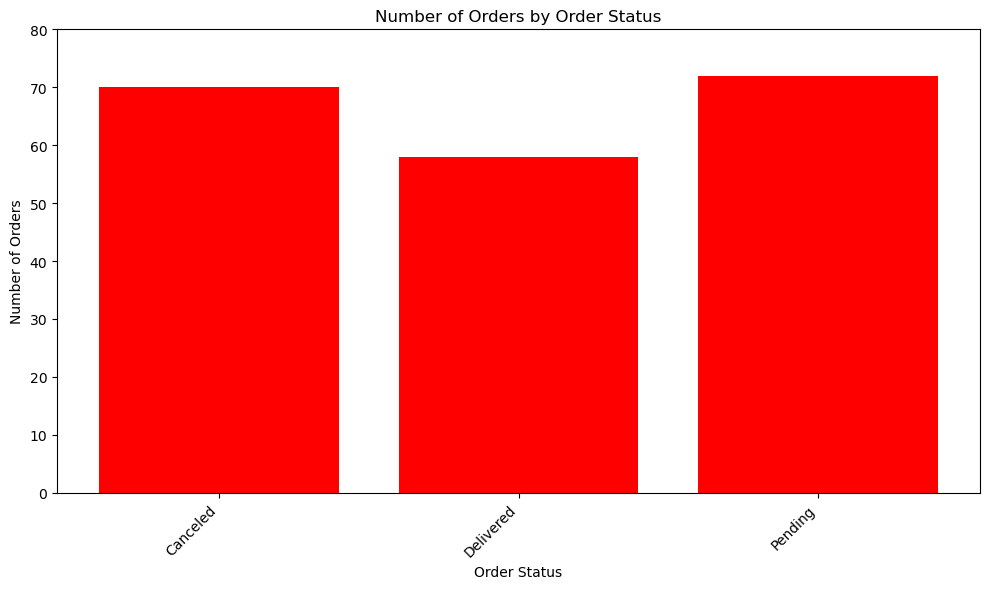

In [ ]:

order_status_count = order_data.groupby('order_status').size()
plt.figure(figsize=(10, 6))
plt.bar(order_status_count.index, order_status_count.values, color='red')

plt.title('Number of Orders by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, order_status_count.max() + 10, 10))  # Y-axis ticks as multiples of 10
plt.tight_layout()
plt.show()


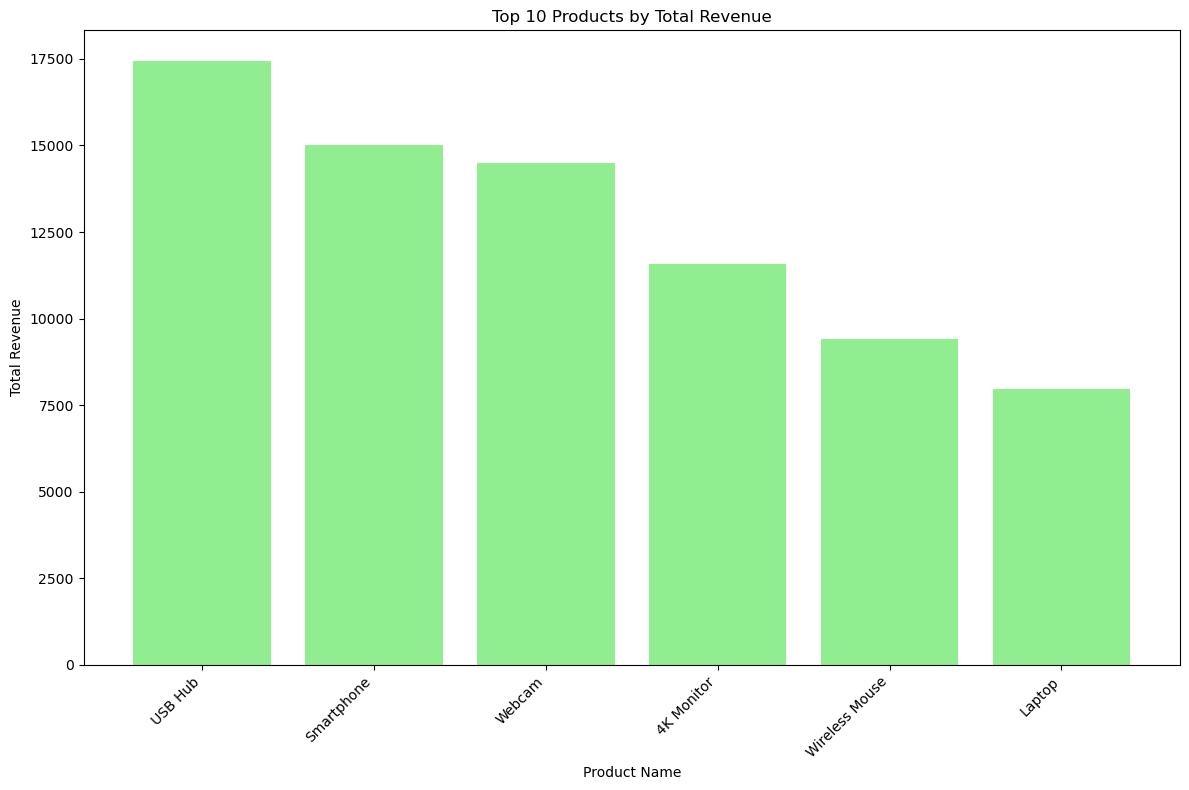

In [ ]:
total_revenue_by_product = order_data.groupby('product_id')['total_price'].sum()
product_revenue_data = total_revenue_by_product.reset_index().merge(product_data[['product_id', 'product_name']], on='product_id')
top_10_products = product_revenue_data.sort_values('total_price', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.bar(top_10_products['product_name'], top_10_products['total_price'], color='lightgreen')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


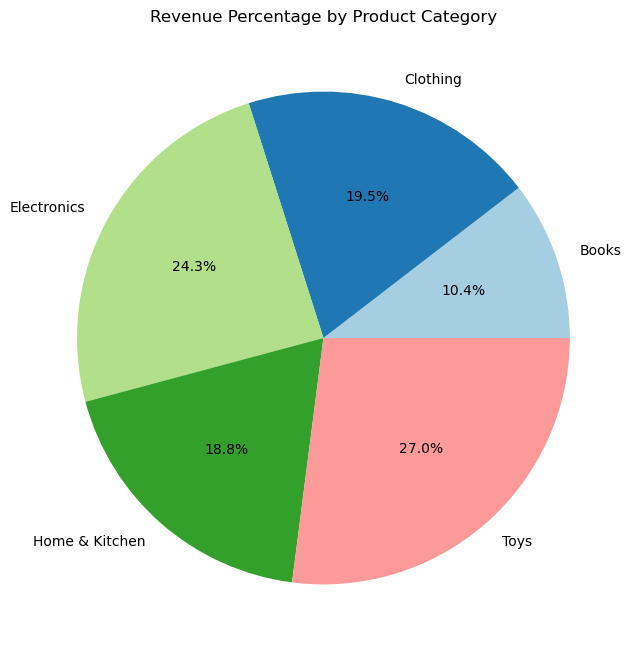

In [ ]:
category_revenue = (
    order_data
    .merge(product_data[['product_id', 'category']], on='product_id')  
    .groupby('category')['total_price']
    .sum()
)
total_revenue = category_revenue.sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100
plt.figure(figsize=(10, 8))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(category_revenue_percentage))))
plt.title('Revenue Percentage by Product Category')
plt.show()

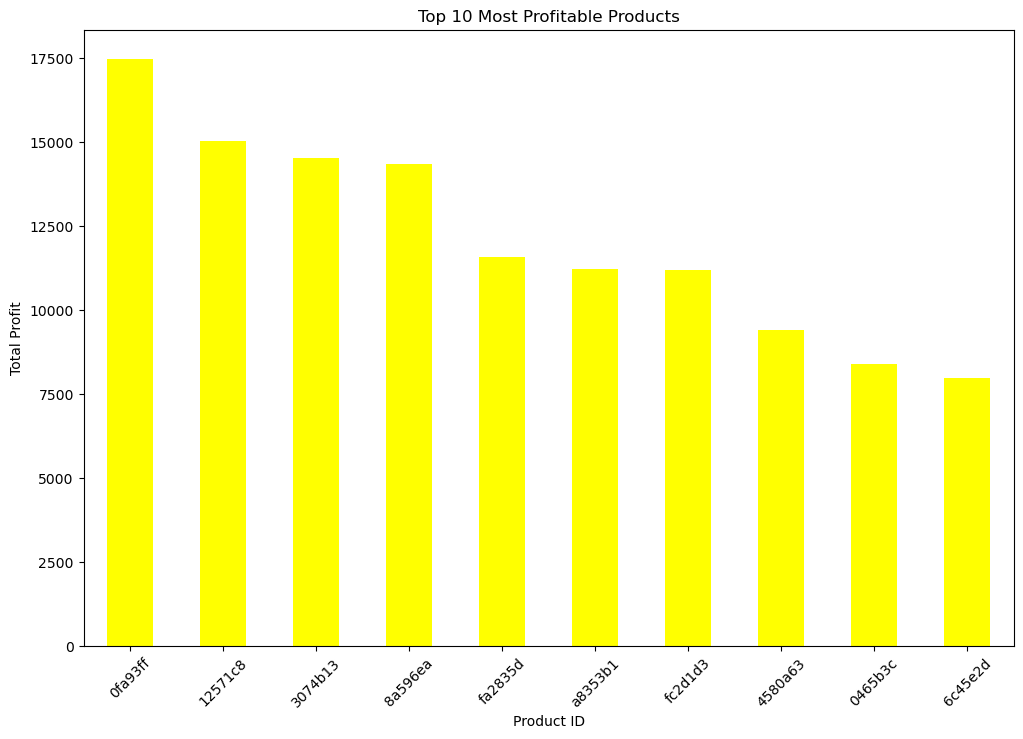

In [ ]:
product_profit = (
    order_data
    .groupby('product_id')['total_price']
    .sum()
)
top_products = product_profit.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_products.plot(kind='bar', color='yellow')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

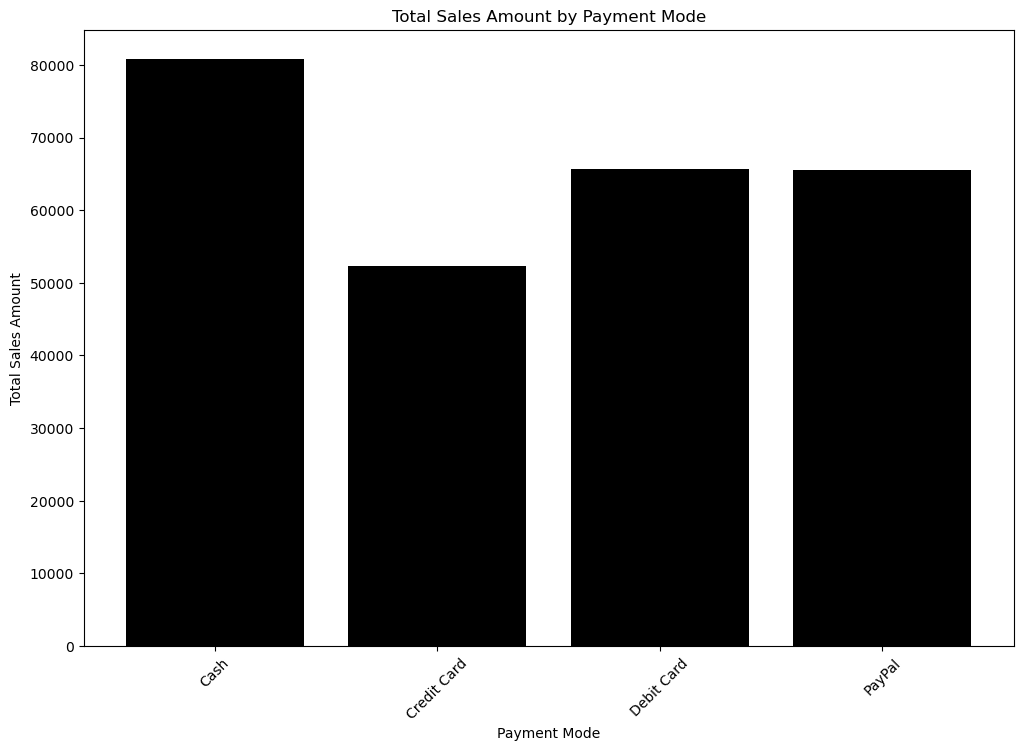

In [ ]:
payment_mode_sales = (
    order_data
    .groupby('payment_mode')['total_price']
    .sum()
)
plt.figure(figsize=(12, 8))
plt.bar(payment_mode_sales.index, payment_mode_sales, color='black')
plt.title('Total Sales Amount by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

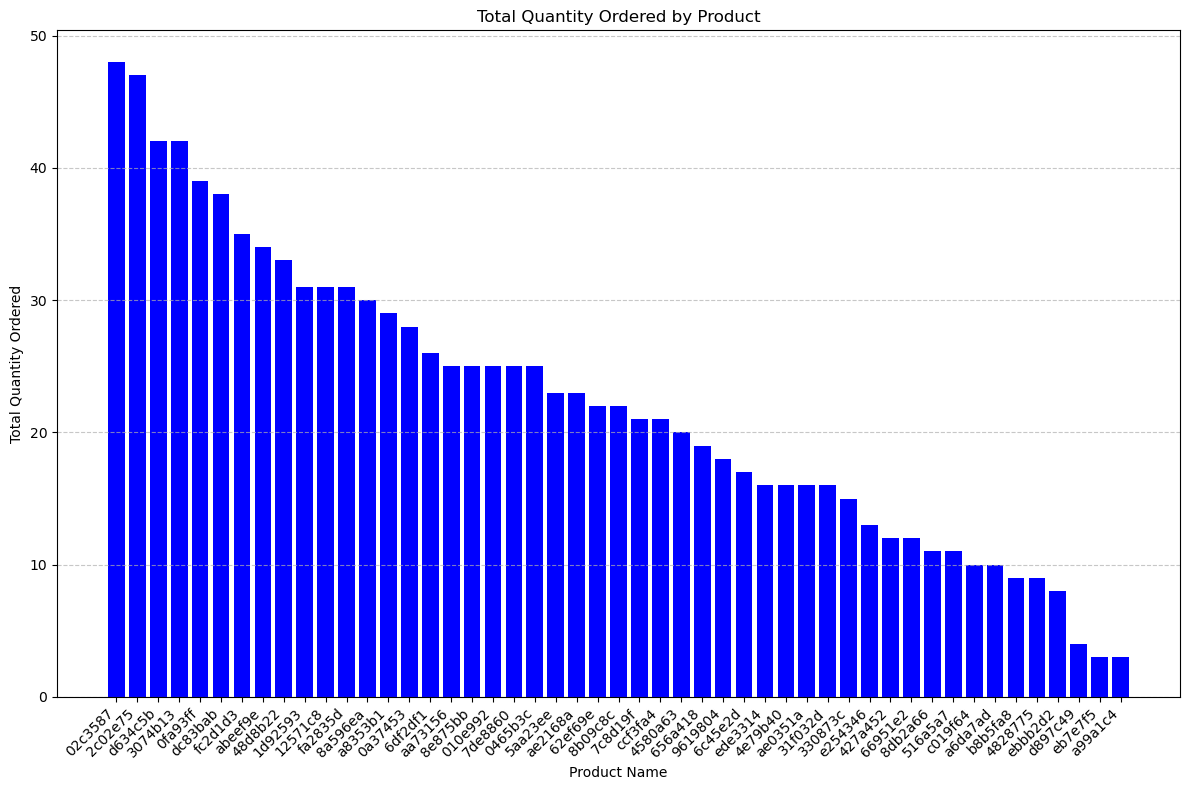

In [ ]:
total_quantity_per_product = order_data.groupby('product_id')['quantity'].sum().reset_index()
total_quantity_per_product = total_quantity_per_product.sort_values(by='quantity', ascending=False)
plt.figure(figsize=(12, 8))
plt.bar(total_quantity_per_product['product_id'], total_quantity_per_product['quantity'], color='blue')
plt.title('Total Quantity Ordered by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()
